# Machine Learning with Python

Collaboratory workshop, 02/22/2018

This is a notebook developed throughout the third day of the Collaboratory Workshop, Machine Learning with Python. For more information, go to the workshop home page:

https://github.com/QCB-Collaboratory/W17.MachineLearning/wiki/Day-3

In [1]:
import numpy as np
import pylab as pl

## Linear regression

Let's get started creating a simple linear dataset using NumPy's random function:

In [2]:
? np.random.random()

In [3]:
numSamples = 100     # Defining the number of samples

linearCoef = 0.5     # This is the correct linear coeficient
Intercept  = 2.2     # This is the correct intercept parameter

X = np.random.random( numSamples )*10.0     # Randomly sampling X-points.
e = np.random.random( numSamples ) - 0.5    # Noise

print("Min of X: ", X.min())
print("Max of X: ", X.max())
print("Average of the error component: ", e.mean())

Min of X:  0.00547500452704
Max of X:  9.31927127645
Average of the error component:  0.0401054626282


Let's define the the dependent variable

In [4]:
Y = linearCoef*X + Intercept + e

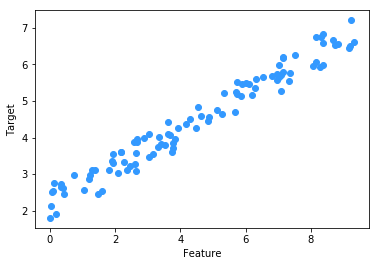

In [5]:
pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))

pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

We want to use the linear model 
$$ Y = \beta X + \gamma $$
If everything works out, we should expect $\beta \approx 0.5$ and $\gamma \approx 2.2$.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
features = X.reshape((numSamples,1))   # features has shape (100,1), while X has shape (100,)

model = LinearRegression()
model.fit( features , Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
x_test = np.linspace(0,10,100)
y_pred = model.predict( x_test.reshape((100,1)) )

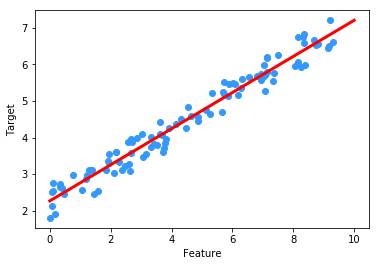

In [9]:
pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))
pl.plot(x_test, y_pred, 'r-', linewidth=3.)
pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

In [10]:
print("Coefficient: ", model.coef_ )
print("Intercept:   ", model.intercept_ )

Coefficient:  [ 0.49409768]
Intercept:    2.26643126095


In [11]:
print(model.score(features, Y))

0.961166114833


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( features, Y, test_size=0.33)
model.fit(X_train, Y_train)
print("Cross-validated R2: ", model.score(X_test, Y_test) )

Cross-validated R2:  0.956357450742


Creating a 2D feature space with $X$ and $X^2$.

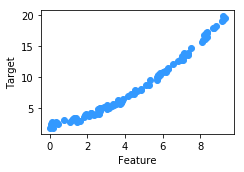

In [13]:
Y = linearCoef*X + 0.15*X**2 + Intercept + e
pl.figure(figsize=(3.5,2.5))

pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))

pl.xlabel('Feature')
pl.ylabel('Target')

pl.tight_layout()
pl.savefig('LinearModel_03.png',dpi=500, transparent=True)
pl.show()

In [14]:
features = np.zeros( (numSamples,2) )
features[:,0] = X
features[:,1] = X**2
print(features.shape)

(100, 2)


In [15]:
model = LinearRegression()
model.fit( features , Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
x_test = np.linspace(0,10,100)
feat_test = np.zeros( (numSamples,2) )
feat_test[:,0] = x_test
feat_test[:,1] = x_test**2

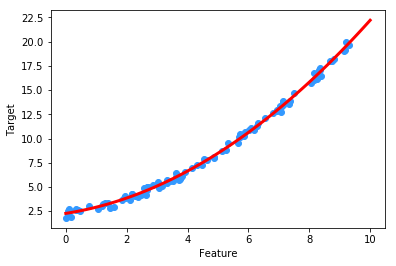

In [17]:
y_pred = model.predict( feat_test )

pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))
pl.plot(x_test, y_pred, 'r-', linewidth=3.)
pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

## Second dataset

Let's explore a more interesting dataset.

In [18]:
data = np.loadtxt('Regression_Exercise_dataset.dat')
print(data.shape)

(30, 2)


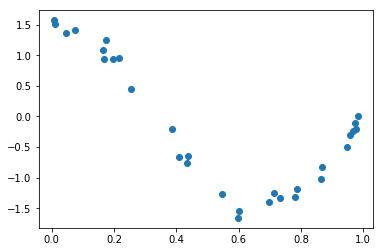

In [19]:
Y = data[:,0]    # all rows, first column
X = data[:,1]   # all rows, all columns except the first

pl.plot(X, Y, 'o')
pl.show()

Lets store in the next array the average value of the coefficeints

In [20]:
coefs = []

In [21]:
model = LinearRegression()
model.fit( X , Y )

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.00623026  0.0089861   0.04416006  0.07494859  0.16384224  0.16797218
  0.17316542  0.19768507  0.2160895   0.25298236  0.38657128  0.40844386
  0.43479153  0.43614665  0.54723225  0.59733394  0.60074272  0.69772882
  0.71481599  0.73338017  0.77938292  0.78630599  0.86299324  0.8662893
  0.94897731  0.95665297  0.96702984  0.97268436  0.97627445  0.98340068].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

According the error message above, the issue is probably with the shape of X.

In [22]:
print( X.shape )

(30,)


As we extensively discussed on Day 2, the features should be organized in an array with shape ```(<Num Samples>, <Num Features>)```. In this particular case, we have only a single feature, so ```Num Features```=1. This is why we will update the shape of X using numpy's reshape function:

In [23]:
X = np.reshape( X, ( X.shape[0], 1 ) )

In [24]:
print( X.shape )

(30, 1)


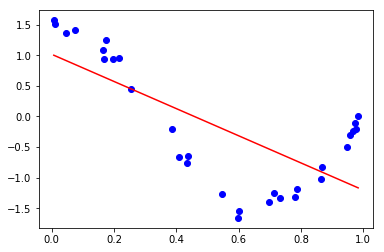

In [25]:
model = LinearRegression()
model.fit( X , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(X), 'r-')
pl.savefig('linearFit_smallerdataset.png', dpi=500)
pl.show()

Let's add a quadratice term:

In [26]:
features = np.c_[ X, X**2 ]
print( features.shape )

(30, 2)


In [27]:
model = LinearRegression()
model.fit( features , Y )
coefs.append( np.abs(model.coef_).mean() )

In [28]:
model.predict(features)

array([ 2.13025393,  2.10258605,  1.75975706,  1.4753622 ,  0.73644551,
        0.70508413,  0.66602252,  0.48722361,  0.35912091,  0.11809241,
       -0.57871367, -0.66653078, -0.76249923, -0.76714504, -1.05148311,
       -1.11733109, -1.12040192, -1.13254492, -1.11962472, -1.10047431,
       -1.03007044, -1.0166443 , -0.81838364, -0.80782546, -0.48802219,
       -0.45297708, -0.40415161, -0.37684548, -0.3592522 , -0.3237401 ])

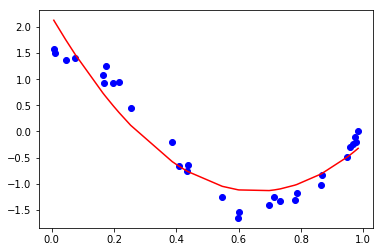

In [29]:
pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.savefig('linearFit2_smallerdataset.png', dpi=300)
pl.show()

Let's add a third component:

In [30]:
features = np.c_[ X, X**2, X**3 ]

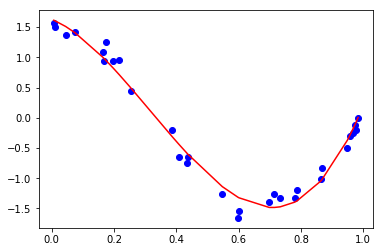

In [31]:
model = LinearRegression()
model.fit( features , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.show()

Let's try with a fifth-degree polynomial. Of course, adding terms by hand is not very efficient, but we can construct the ```features``` array for an arbitrary polynomial by using the following snippet of code:

In [32]:
degree = 5
features = np.zeros( (X.shape[0], degree) )
for j in range(degree):
    features[:,j] = X[:,0]**(j+1)

In [33]:
features.shape

(30, 5)

Let's now evaluate and plot it:

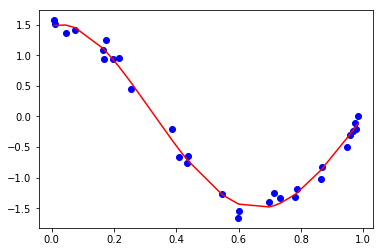

In [34]:
model = LinearRegression()
model.fit( features , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.show()

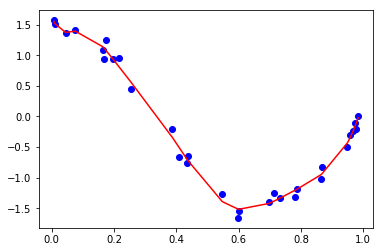

In [35]:
degree = 10
features = np.zeros( (X.shape[0], degree) )
for j in range(degree):
    features[:,j] = X[:,0]**(j+1)

model = LinearRegression()
model.fit( features , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.show()

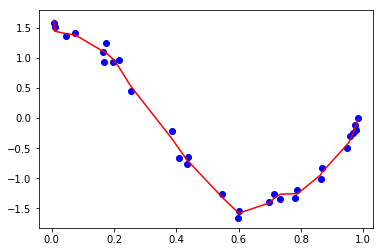

In [36]:
degree = 15
features = np.zeros( (X.shape[0], degree) )
for j in range(degree):
    features[:,j] = X[:,0]**(j+1)

model = LinearRegression()
model.fit( features , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.show()

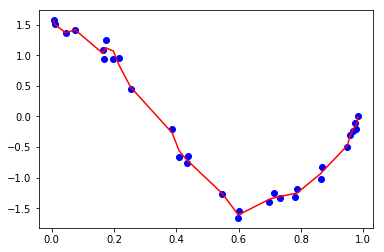

In [37]:
degree = 20
features = np.zeros( (X.shape[0], degree) )
for j in range(degree):
    features[:,j] = X[:,0]**(j+1)

model = LinearRegression()
model.fit( features , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.show()

Example of how to save a beautiful plot:

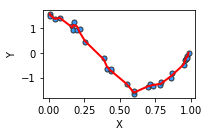

In [38]:
pl.figure( figsize=(3,2) )

pl.plot(X, Y, 'o', markersize=5, markeredgecolor=(0.2,0.2,0.2), color=(0.2,0.6,1.0))

model = LinearRegression()
model.fit( features , Y )
pl.plot(X, model.predict(features), 'r-', lw=2)

pl.xlabel('X')
pl.ylabel('Y')

pl.tight_layout()
pl.savefig('LinearModel_07.png', dpi=500, transparent=True)
pl.show()

In [39]:
coefs

[2.2165337822219282,
 8.9416736660470537,
 9.4312776587048717,
 15.340241499881021,
 69852.54063157257,
 1043153581.8156064,
 463115392606.61816]

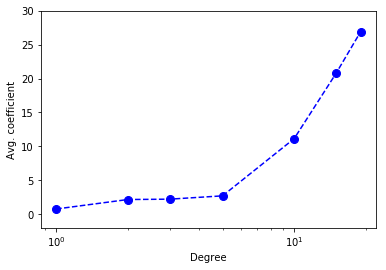

In [41]:
pl.plot([1,2,3,5,10,15,19], np.log(coefs),'bo--', markersize=8)

pl.ylabel('Avg. coefficient')
pl.ylim(-2,30)
pl.xlabel('Degree')
pl.xscale('log')

pl.show()

## Exploring meta-parameter regularization using the Ridge model

In [42]:
from sklearn.linear_model import Ridge

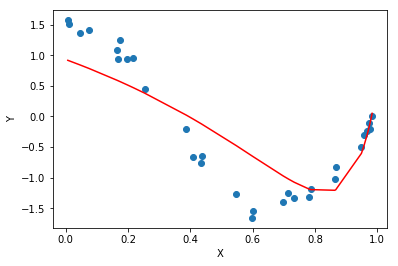

In [43]:
model = Ridge( alpha = 1.0 )
model.fit( features , Y )

pl.plot(X, Y, 'o')
pl.plot(X, model.predict(features), 'r-')

pl.xlabel('X')
pl.ylabel('Y')
pl.show()

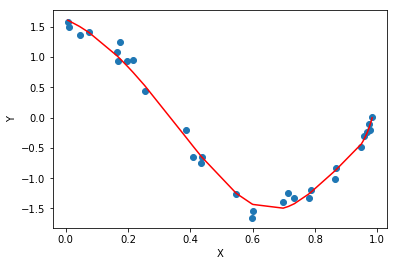

In [44]:
model = Ridge( alpha = 0.001 )
model.fit( features , Y )

pl.plot(X, Y, 'o')
pl.plot(X, model.predict(features), 'r-')

pl.xlabel('X')
pl.ylabel('Y')
pl.show()

# Unsupervised Learning

## K-means

Let's explore the iris dataset using the K-means clustering algorithm. We first import the data using ```sklearn.datasets```.

In [45]:
from sklearn.datasets import load_iris

In [46]:
iris_data = load_iris()
print( iris_data.data.shape )

(150, 4)


Before we move on, let's visualize the dataset. You can change the features being visualized below.

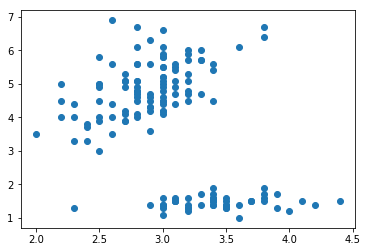

In [47]:
pl.plot( iris_data.data[:,1], iris_data.data[:,2], 'o' )
pl.show()

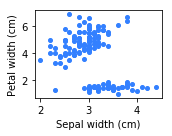

In [48]:
pl.figure( figsize=(2.5,2) )

pl.plot( iris_data.data[:,1], iris_data.data[:,2], 'o', 
            color=(0.2,0.5,1.0), markersize=4 )

pl.xlabel('Sepal width (cm)')
pl.ylabel('Petal width (cm)')

pl.tight_layout()
pl.savefig('IrisPlot.png', dpi=300)
pl.show()

Next, let's create a KMeans model and apply to the iris dataset. Because we know there are three different species of plants in this dataset, let's make an educated guess and use $K=3$ (i.e., we will set the parameter ```n_clusters``` to 3).

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans( n_clusters=3 )

In [51]:
kmeans.fit( iris_data.data )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

After the K-means method is applied to the dataset, we can then get the ID of the clusters to which each of the samples is predicted to belong to by using the method ```predict```. 

In [52]:
clusters = kmeans.predict( iris_data.data )
print( "Shape: ", clusters.shape )
print( "Cluster IDs: ", clusters )

Shape:  (150,)
Cluster IDs:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Let's visualize the resulting clustering by color-coding each cluster ID. This is very similar to how we color-coded different classes in classification datasets.

In [53]:
index0 = clusters == 0
index1 = clusters == 1
index2 = clusters == 2

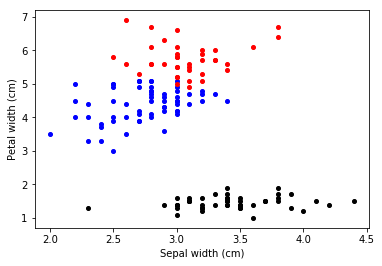

In [54]:
pl.plot( iris_data.data[index0,1], iris_data.data[index0,2], 
            'o', color='b', markersize=4 )
pl.plot( iris_data.data[index1,1], iris_data.data[index1,2], 
            'o', color='k', markersize=4 )
pl.plot( iris_data.data[index2,1], iris_data.data[index2,2], 
            'o', color='r', markersize=4 )

pl.xlabel('Sepal width (cm)')
pl.ylabel('Petal width (cm)')

pl.show()

Let's try $K=4$ and inspect what comes out differently. 

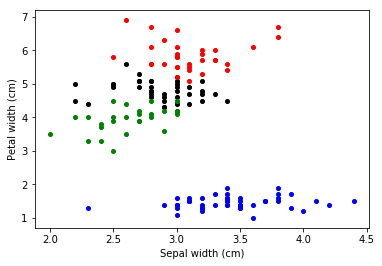

In [55]:
kmeans = KMeans( n_clusters=4 )
kmeans.fit( iris_data.data )
clusters = kmeans.predict( iris_data.data )

index0 = clusters == 0
index1 = clusters == 1
index2 = clusters == 2
index3 = clusters == 3

pl.plot( iris_data.data[index0,1], iris_data.data[index0,2], 
            'o', color='b', markersize=4 )
pl.plot( iris_data.data[index1,1], iris_data.data[index1,2], 
            'o', color='k', markersize=4 )
pl.plot( iris_data.data[index2,1], iris_data.data[index2,2], 
            'o', color='r', markersize=4 )
pl.plot( iris_data.data[index3,1], iris_data.data[index3,2], 
            'o', color='g', markersize=4 )

pl.xlabel('Sepal width (cm)')
pl.ylabel('Petal width (cm)')

pl.show()

## Principal Component Analysis

In [56]:
from sklearn.decomposition import PCA

In [57]:
X = np.random.random( (200, 3) )   # 50 samples with 3 features
X[:,2] = X[:,0]

Covariance matrix:
  [[ 0.08077212  0.00604441  0.08077212]
 [ 0.00604441  0.08980559  0.00604441]
 [ 0.08077212  0.00604441  0.08077212]]


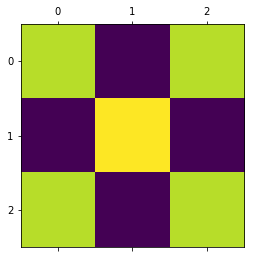

In [58]:
print("Covariance matrix:\n ", np.cov(X.T))  # \n breaks the line
pl.matshow(np.cov(X.T))
pl.savefig('CovMatrix_example.png', dpi=300)
pl.show()

In [59]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca.explained_variance_ratio_

array([  6.46703162e-01,   3.53296838e-01,   9.86262093e-33])

In [61]:
pca.components_

array([[ -7.02274646e-01,  -1.16707506e-01,  -7.02274646e-01],
       [  8.25246687e-02,  -9.93166330e-01,   8.25246687e-02],
       [  7.07106781e-01,   4.26753168e-17,  -7.07106781e-01]])

[[  1.62548726e-01   3.95412346e-17  -5.76083161e-19]
 [  3.95412346e-17   8.88010980e-02  -2.74801965e-18]
 [ -5.76083161e-19  -2.74801965e-18   1.59308455e-34]]


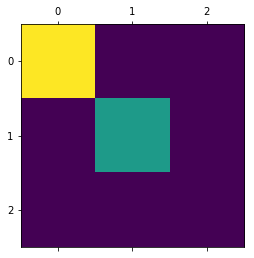

In [62]:
X_transform = pca.transform(X)
print(np.cov(X_transform.T))
pl.matshow(np.cov(X_transform.T))
pl.savefig('CovMatrix_example_PCA.png', dpi=300)
pl.show()

## In-class practice: Using PCA on the Breast Cancer dataset

In [63]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

In [64]:
pca = PCA()
pca.fit( bcancer.data )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Let's visualize the importance of each Principal Component.

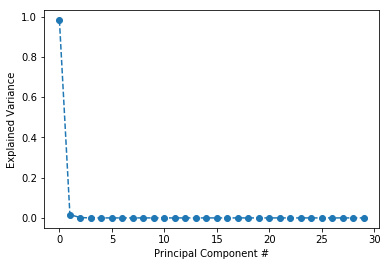

In [65]:
pl.plot( pca.explained_variance_ratio_, 'o--' )
pl.ylabel( 'Explained Variance' )
pl.xlabel( 'Principal Component #' )
pl.show()

A better way to visualize the decay is using log-scale:

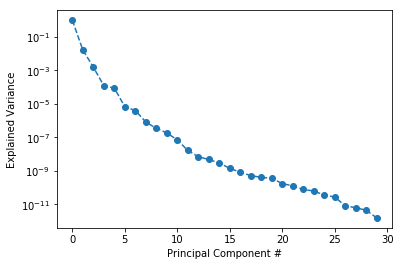

In [66]:
pl.plot( pca.explained_variance_ratio_, 'o--' )
pl.ylabel( 'Explained Variance' )
pl.yscale('log')
pl.xlabel( 'Principal Component #' )
pl.show()

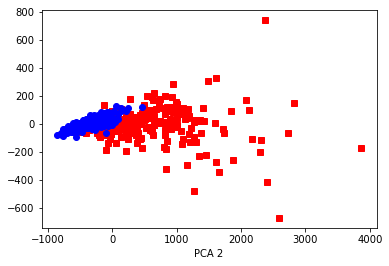

In [67]:
bcancer_PCAs = pca.transform( bcancer.data )

index0 = bcancer.target == 0
index1 = bcancer.target == 1

pl.plot( bcancer_PCAs[index0,0], bcancer_PCAs[index0,1], 's', color='r' )
pl.plot( bcancer_PCAs[index1,0], bcancer_PCAs[index1,1], 'o', color='b' )

pl.xlabel('PCA 1')
pl.xlabel('PCA 2')

pl.show()

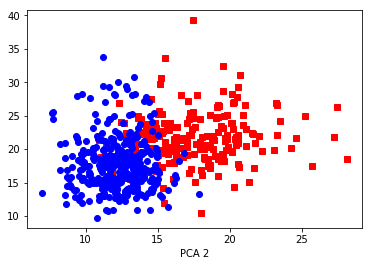

In [68]:
bcancer_PCAs = pca.transform( bcancer.data )

pl.plot( bcancer.data[index0,0], bcancer.data[index0,1], 's', color='r' )
pl.plot( bcancer.data[index1,0], bcancer.data[index1,1], 'o', color='b' )

pl.xlabel('PCA 1')
pl.xlabel('PCA 2')

pl.show()

Looking at the overlap between samples from the two classes, let's plot the histograms:

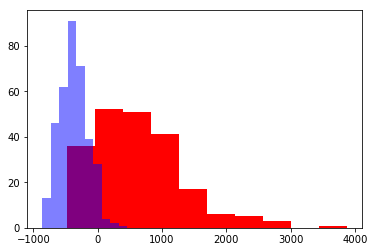

In [69]:
pl.hist( bcancer_PCAs[index0,0], color='r' )
pl.hist( bcancer_PCAs[index1,0], color='b', alpha=0.5 )

pl.show()

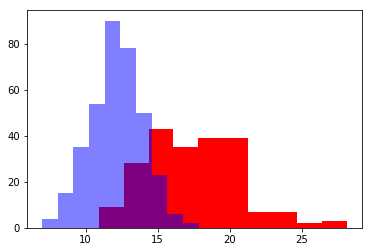

In [70]:
pl.hist( bcancer.data[index0,0], color='r' )
pl.hist( bcancer.data[index1,0], color='b', alpha=0.5 )

pl.show() 

# Practice

Here are the solutions of the one (out of two) exercise left for you to try after the class.

### Practice 2 - Interpreting "principal axis"

In [71]:
numSamples = 100     # Defining the number of samples

linearCoef = 0.5     # This is the correct linear coeficient
Intercept  = 2.2     # This is the correct intercept parameter

X = np.random.random( numSamples )*10.0     # Randomly sampling X-points.
e = np.random.random( numSamples ) - 0.5    # Noise
Y = linearCoef*X + Intercept + e

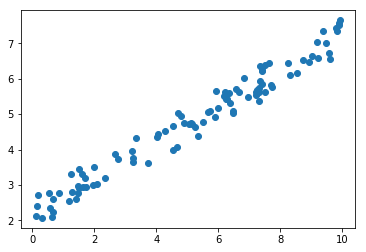

In [72]:
pl.plot(X,Y,'o')
pl.show()

In [73]:
data = np.array( [X, Y] ).T
np.cov(data.T)

array([[ 8.66014335,  4.36759526],
       [ 4.36759526,  2.28028119]])

In [74]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [75]:
pca.explained_variance_ratio_

array([ 0.99435651,  0.00564349])

In [76]:
pca.components_

array([[-0.89157245, -0.4528781 ],
       [ 0.4528781 , -0.89157245]])

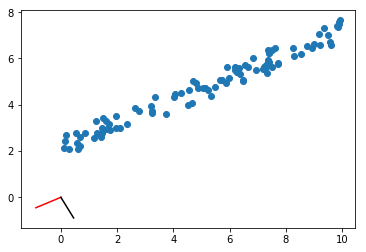

In [77]:
pl.plot(X,Y,'o')
pl.plot([0,pca.components_[0,0]],[0,pca.components_[0,1]],'r-')
pl.plot([0,pca.components_[1,0]],[0,pca.components_[1,1]],'k-')
pl.show()

In [78]:
X_transform = pca.transform( data )
np.cov(X_transform.T)

array([[  1.08786823e+01,   5.20346953e-16],
       [  5.20346953e-16,   6.17421838e-02]])